In [ ]:
#161805041
#UĞUR CAN KÖK
#Course : Introduction to Neuroscience
#Final : Autoencoder and GANs Model 
#Library : Keras
#Description of Project : Comparison of the results of models created using the same dataset with autoencoder and GANs.
                        #I will use autoencoder and GANs on the same dataset and I will compare the result. 
                        #Autoencoder and GANs do similar thing but using different technique.
#Dataset : I was prepared the dataset for my thesis project. In my dataset I have 20.800 images which is added gaussian noise, salt & pepper noise and some basic operaitons.

In this project, I will be working on autoencoder and GANs. As I always do, I will give information about the subject and then I will explain it on the code. In my previous projects, I worked on supervised learning and now I will talk about unsupervised learning algorithms such as autoencoder and GANs. Autoencoder enters unsupervised learning in deep learning. There are two important operations in Autoencoder. The first is the encode part and the other is the decode part. If we briefly define the autoencoder, to ensure that the trained input dataset is the same as the output. We aim for the value of loss to be close to zero. In other words, we ensure that the input data and output are the same. The important part for us in doing this is feature extraction because the better features we extract from the input we receive, the more realistic images we get in the output. There are 3 parts in the autoencoder. These are dimension reduction, feature extraction and denoising. Dimension reduction and feature extraction is about getting the right features, as I just said. Denoising has a different working order than these. First of all let me touch on the first two parts. Autoencoder works as follows. First of all, we take our input. We put the input we receive into the encoded neural network, and then we have a hidden layer. Finally, we compare input and output and make our loss value close to zero. The first two parts work this way. In the denoising part, the basic logic differs in this way but at some point. Let us say that we have one picture to explain it through learning. We add noise before putting this picture into encode stage. Then we do the encoding and decode stages on the noise picture. The aim is to learn noise. Generally it works like two other parts except noise. I tried to express Autoencoder in general. Now, let's evaluate these things on the code. I used google colab for developing that project.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
import os
print(os.stat('/content/drive/My Drive/thesisDataset.zip').st_size/1000000000) # GigaBytes (approx)

1.134422323


In [ ]:
% cd /content/

/content


In [ ]:
# unzip to image dataset folder
ImageSet = '/content/drive/My Drive/thesisDataset.zip'
import zipfile
zip_ref = zipfile.ZipFile(ImageSet, 'r')
zip_ref.extractall('ImageDataset')
zip_ref.close()

In [ ]:
! ls

drive  ImageDataset  sample_data


In [ ]:
% cd /content/ImageDataset/thesisDataset/

/content/ImageDataset/thesisDataset


In [ ]:
#Importing the our crucial library
from keras.models import Model
from keras.layers import Dense, Input,Conv2D, MaxPool2D,UpSampling2D
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt # to visualize the our data
import numpy as np #to use math operations
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [ ]:
#I read the folder which is in my dataset.
import glob
data_img = glob.glob('/content/ImageDataset/thesisDataset/*.jpg')

In [ ]:
#I added the all images from my dataset to list which is called all_images
from keras_preprocessing import image

all_images = []

for i in range(len(data_img)):
  img = image.load_img(data_img[i], target_size=(80,80))
  img = image.img_to_array(img) #to convert image to array 
  all_images.append(img)

In [ ]:
#convert list to numpy array
all_images = np.array(all_images)

In [ ]:
#Here we should split our dataset as train and test test.
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(all_images, train_size=0.8, test_size=0.2, shuffle=True) #shuffle true because to select different data each time the program runs
print("Train and Test size", len(dataset_train), len(dataset_test))
#I don't need to label because I am working on unsupervised learning.

Train and Test size 16640 4160


In [ ]:
print(type(dataset_train))

<class 'numpy.ndarray'>


In [ ]:
#I change the array to float
dataset_train = dataset_train.astype("float32") / 255.0 
dataset_test = dataset_test.astype("float32") /255.0

In [ ]:
dataset_train.shape

(16640, 80, 80, 3)

In [ ]:
#reshape the train and test dataset
dataset_train = dataset_train.reshape((len(dataset_train), np.prod(dataset_train.shape[1:])))
dataset_test = dataset_test.reshape((len(dataset_test), np.prod(dataset_test.shape[1:])))

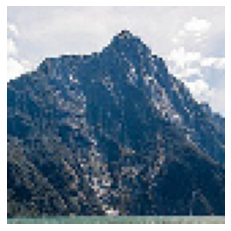

In [ ]:
#visualizing the train dataset
plt.imshow(dataset_train[1000].reshape(80,80,3)) #I made a reshape to make visualization in matplotlib
plt.axis("off")
plt.show()

In [ ]:
#Basic Autoencoder (Simpliest version). There is no deep in that example.

# this is the size of our encoded representations
encoding_dim = 32 

# this is our input placeholder
input_img = Input(shape=(19200,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(19200, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
#compiling the autoencoder. I used rmsprop as an optimizer and binary_crossentropy as a loss
autoencoder.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [ ]:
history = autoencoder.fit(dataset_train, dataset_train, epochs = 25, batch_size = 256, shuffle = True, validation_data = (dataset_train,dataset_train)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 16640 samples
Epoch 1/25
16640/16640 [==============================] - 16s 976us/step - loss: 0.6697 - val_loss: 0.6645
Epoch 2/25
16640/16640 [==============================] - 16s 984us/step - loss: 0.6635 - val_loss: 0.6609
Epoch 3/25
16640/16640 [==============================] - 16s 961us/step - loss: 0.6583 - val_loss: 0.6547
Epoch 4/25
16640/16640 [==============================] - 16s 979us/step - loss: 0.6542 - val_loss: 0.6519
Epoch 5/25
16640/16640 [==============================] - 16s 963us/step - loss: 0.6529 - val_loss: 0.6540
Epoch 6/25
16640/16640 [==============================] - 16s 973us/step - loss: 0.6524 - val_loss: 0.6511
Epoch 7/25
16640/16640 [==============================] - 16s 950us/step - loss: 0.6518 - val_loss: 0.6507
Epoch 8/25
16640/16640 [==============================] - 16s 969us/step - loss: 0.6514 - val_loss: 0.6507
Epoch 9/25
16640/16640 [==============================] - 16s 951us/step - loss: 0.6510 - val_

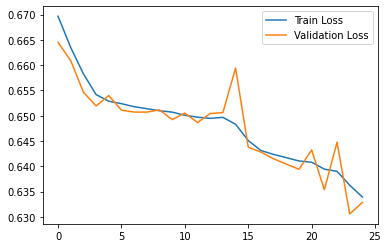

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#What result did we get when we put it into the Encoder Model
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(dataset_test)

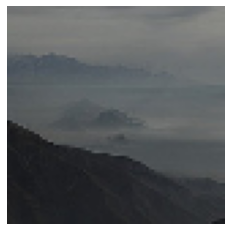

In [ ]:
#visualizing the test dataset
plt.imshow(dataset_test[1301].reshape(80,80,3))
plt.axis("off")
plt.show()

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test)

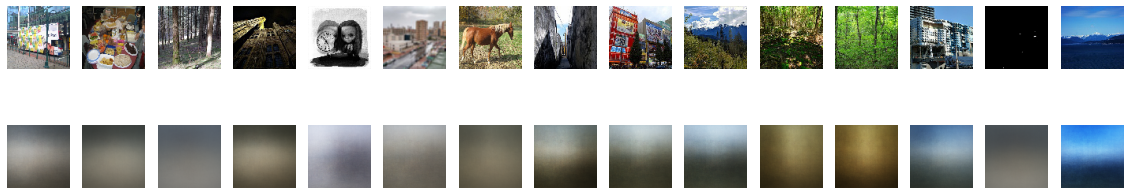

In [ ]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

First I explained the concept of autoencoder and then I made an autoencoder without such hidden layers in between. We trained our model when the number of epoch is 25 and batch_size is 256. My loss value was 0.6339, and validation loss value was 0.6328. These are the rates that I can call very high. Then what should we do? Let's increase our hidden layer number and have a deeper learning. I can say that I did not encounter any situation like overfitting in our first attempt, but let's continue by adding hidden layer with high loss value. One of our goals is to bring the loss value closer to zero. I can not say that we got very good results from the first try because when looking at the output, the pictures do not look very good. Our other important goal is to get pictures close to input. When we compare the pictures in our test dataset with the pictures in our dataset, the similarity between input pictures and output pictures is almost nonexistent. We can say that this shows that we do not train our model well, because we do not have hidden layer, we can say that we have achieved such a result or we have achieved such a result due to under fitting. So let's continue by increasing the number of our hidden liners.

In [ ]:
#Second Step. I added some hidden layers and then I will check what kind of result I will get.
#My pictures are all right, now I will autoencoder. The input will consist of 19200 nuerons because I made 80 * 80 * 3.
input_img = Input(shape=(19200,)) #input layer is complete.

encoded = Dense(64, activation = 'relu')(input_img) #Encoder was created. 64 layers. I wrote input_img to connect with autoencoder and input image
encoded = Dense(32, activation = 'relu')(encoded) #I did an encoder one more. I use parentheses to connect the interiors.
encoded = Dense(16, activation = 'relu')(encoded) #I did an encoder one more. I use parentheses to connect the interiors.

decoded = Dense(32, activation = 'relu',)(encoded) #I did an decoder. I use parentheses to connect the interiors.
decoded = Dense(64, activation = 'relu',)(decoded)

output = Dense(19200, activation = 'sigmoid',)(decoded) #My output model is here.
autoencoder = Model(input_img,output) #autoencoder model was created. Now I will compile.

In [ ]:
#compiling the autoencoder. I used rmsprop as an optimizer and binary_crossentropy as a loss
autoencoder.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [ ]:
history = autoencoder.fit(dataset_train, dataset_train, epochs = 25, batch_size = 256, shuffle = True, validation_data = (dataset_train,dataset_train)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 16640 samples
Epoch 1/25
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6703 - val_loss: 0.6574
Epoch 2/25
16640/16640 [==============================] - 18s 1ms/step - loss: 0.6552 - val_loss: 0.6461
Epoch 3/25
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6459 - val_loss: 0.6374
Epoch 4/25
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6410 - val_loss: 0.6415
Epoch 5/25
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6378 - val_loss: 0.6329
Epoch 6/25
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6352 - val_loss: 0.6310
Epoch 7/25
16640/16640 [==============================] - 18s 1ms/step - loss: 0.6319 - val_loss: 0.6285
Epoch 8/25
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6282 - val_loss: 0.6242
Epoch 9/25
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6251 - val_loss: 0.6256
Epoch

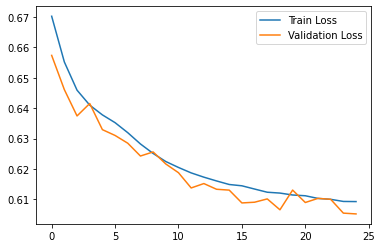

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#What result did we get when we put it into the Encoder Model
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(dataset_test)

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test)

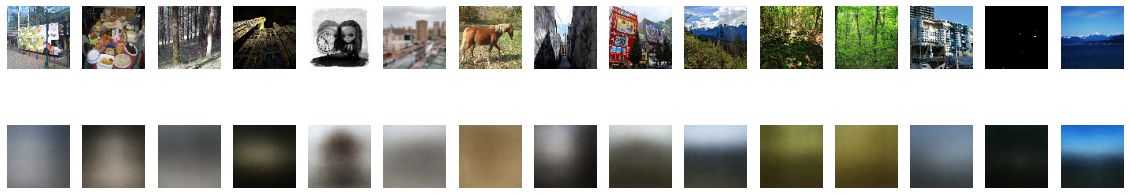

In [ ]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

What did I do in the second step? I trained our model by adding more hidden layers. The eopch and batch_size values in the previous step were the same, but even if I added more hidden layers in the second step, my loss value and verification value was still high like the first model. My loss value is 0.6092, my validation value is 0.6052. Normally, when the number of hidden layers increases, learning will increase and I expected the loss and verification loss values to be lower than the previous model, but it was not what I expected. Although we achieved better results in the second step than the first step, it is far from our expectation. I think it is underfitting and let's increase the number of epoch and try again.

In [ ]:
history = autoencoder.fit(dataset_train, dataset_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = (dataset_train,dataset_train)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 16640 samples
Epoch 1/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6673 - val_loss: 0.6613
Epoch 2/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6505 - val_loss: 0.6523
Epoch 3/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6435 - val_loss: 0.6381
Epoch 4/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6401 - val_loss: 0.6376
Epoch 5/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6365 - val_loss: 0.6408
Epoch 6/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6342 - val_loss: 0.6292
Epoch 7/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6302 - val_loss: 0.6267
Epoch 8/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6278 - val_loss: 0.6257
Epoch 9/50
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6253 - val_loss: 0.6250
Epoch

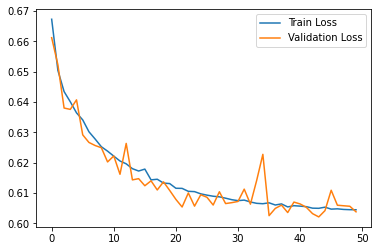

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#What result did we get when we put it into the Encoder Model
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(dataset_test)

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test)

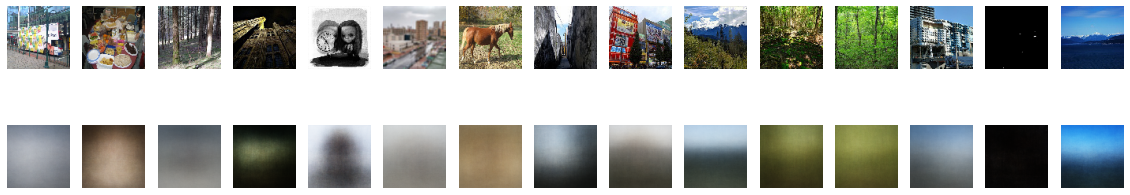

In [ ]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

When we look up to now, as a result of 3 steps, I got better results in every step. When you compare the pictures, we can easily see this difference. This time my loss value is 0.6045, my validation loss value is 0.6038. I think my model is underfitting because I get even better results as I train the model. I will try again by making the number of epoch 250. But our loss value is still higher than I wanted.

In [ ]:
history = autoencoder.fit(dataset_train, dataset_train, epochs = 250, batch_size = 256, shuffle = True, validation_data = (dataset_train,dataset_train)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 16640 samples
Epoch 1/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6689 - val_loss: 0.6597
Epoch 2/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6571 - val_loss: 0.6471
Epoch 3/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6471 - val_loss: 0.6440
Epoch 4/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6413 - val_loss: 0.6401
Epoch 5/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6380 - val_loss: 0.6395
Epoch 6/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6353 - val_loss: 0.6333
Epoch 7/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6324 - val_loss: 0.6304
Epoch 8/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6296 - val_loss: 0.6282
Epoch 9/250
16640/16640 [==============================] - 19s 1ms/step - loss: 0.6262 - val_loss: 0.6

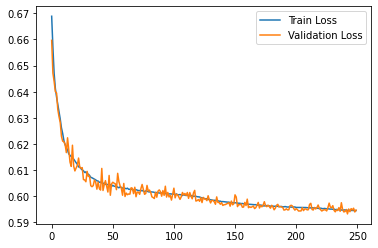

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#What result did we get when we put it into the Encoder Model
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(dataset_test)

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test)

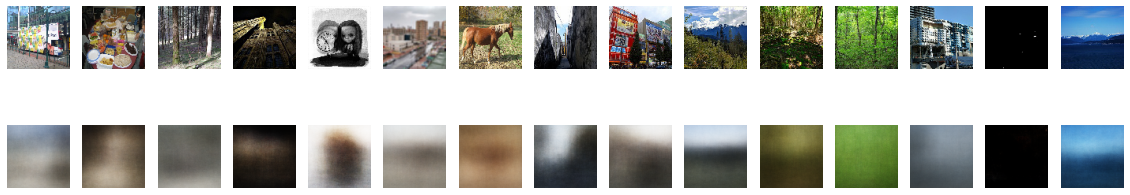

In [ ]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

In general, we get much better results as we train our model, although our loss and validation values are high. The point we will be careful about here is that we will increase the number of epoches so that we do not fall into overfitting. While doing the second step, I wrote the number of layers in each Dense. It is possible to train our model and get better results by changing the hyperparameters such as bach_size, learning rate by playing with the values there. I will now mention the Denoising section and the Convolutional section on the autoencoder, create my GANs model and comment on my results. Before that I will do one more time with epoch 500.

In [ ]:
history = autoencoder.fit(dataset_train, dataset_train, epochs = 500, batch_size = 256, shuffle = True, validation_data = (dataset_train,dataset_train)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 16640 samples
Epoch 1/500
16640/16640 [==============================] - 5s 290us/step - loss: 0.6693 - val_loss: 0.6598
Epoch 2/500
16640/16640 [==============================] - 3s 195us/step - loss: 0.6544 - val_loss: 0.6429
Epoch 3/500
16640/16640 [==============================] - 3s 196us/step - loss: 0.6445 - val_loss: 0.6383
Epoch 4/500
16640/16640 [==============================] - 3s 195us/step - loss: 0.6383 - val_loss: 0.6366
Epoch 5/500
16640/16640 [==============================] - 3s 194us/step - loss: 0.6335 - val_loss: 0.6311
Epoch 6/500
16640/16640 [==============================] - 3s 196us/step - loss: 0.6307 - val_loss: 0.6327
Epoch 7/500
16640/16640 [==============================] - 3s 197us/step - loss: 0.6284 - val_loss: 0.6237
Epoch 8/500
16640/16640 [==============================] - 3s 196us/step - loss: 0.6260 - val_loss: 0.6226
Epoch 9/500
16640/16640 [==============================] - 3s 196us/step - loss: 0.6236 - val_

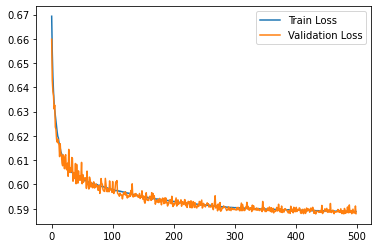

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test)

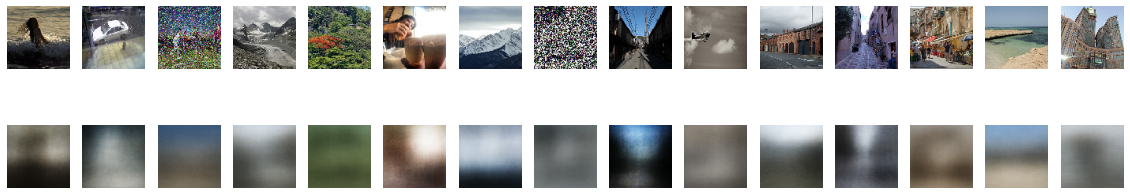

In [ ]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

At the end of the second step, I trained my data as epoch number 500 and although the results I obtained were not bad, when I visualized the results, my result was not very satisfactory.

In [ ]:
#Third Step: Denoising Autoencoder
#I will add some noise to my images and then I will use autoencoder to that dataset.

noise_factor = 0.5 #Noise factor
dataset_train_noisy = dataset_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=dataset_train.shape) 
dataset_test_noisy = dataset_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=dataset_test.shape) 

dataset_train_noisy = np.clip(dataset_train_noisy, 0., 1.)
dataset_test_noisy = np.clip(dataset_test_noisy, 0., 1.)

In [ ]:
# I am using the code I use in the second part.
input_img = Input(shape=(19200,)) 

encoded = Dense(128, activation = 'relu')(input_img) 
encoded = Dense(64, activation = 'relu')(encoded) 
encoded = Dense(32, activation = 'relu')(encoded) 

decoded = Dense(64, activation = 'relu',)(encoded) 
decoded = Dense(128, activation = 'relu',)(decoded)

output = Dense(19200, activation = 'sigmoid',)(decoded) 
autoencoder = Model(input_img,output)

In [ ]:
#compiling the autoencoder. I used rmsprop as an optimizer and binary_crossentropy as a loss
autoencoder.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [ ]:
history = autoencoder.fit(dataset_train_noisy, dataset_train, epochs = 150, batch_size = 256, shuffle = True, validation_data = (dataset_test_noisy,dataset_test)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 4160 samples
Epoch 1/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6024 - val_loss: 0.6101
Epoch 2/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6026 - val_loss: 0.6042
Epoch 3/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6021 - val_loss: 0.6037
Epoch 4/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6026 - val_loss: 0.6038
Epoch 5/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6022 - val_loss: 0.6027
Epoch 6/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6021 - val_loss: 0.6043
Epoch 7/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6021 - val_loss: 0.6049
Epoch 8/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6023 - val_loss: 0.6048
Epoch 9/150
16640/16640 [==============================] - 21s 1ms/step - loss: 0.6019 - val_loss: 0.60

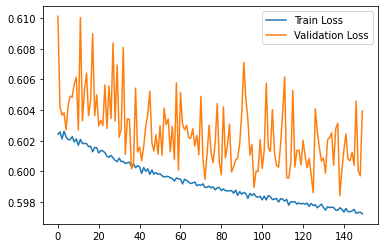

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#What result did we get when we put it into the Encoder Model
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(dataset_test_noisy)

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test_noisy)

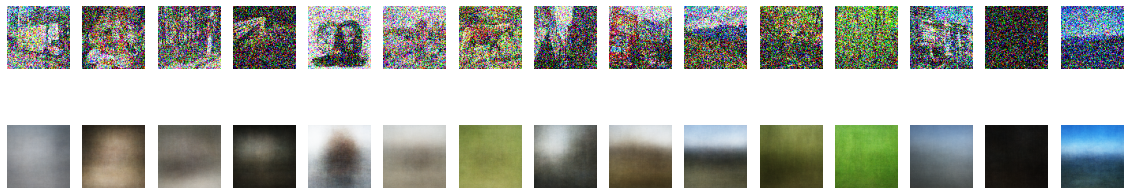

In [ ]:
#You can see the noisely image on my dataset and you can see the output.
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test_noisy[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

What I do in autoencoder denoising, I first added noise to the pictures I received as input. Then, I tried to make the output be the same with the input by encoding and decoding these pictures. I think the results are not the way we want underfitting, but I also showed the different usage area of autoencoder. Denoising part system learned the noise. Finally, let's see how the autoencoder will give results on the CNN model. First, let's start by creating our model.

In [ ]:
#Fourth Step: CNN model for autoencoder

input_img = Input(shape=(80,80,3)) #input image shape
x1 = Conv2D(32, (3,3), activation = 'relu',padding='same')(input_img) #I added convolution, 256 layer
x2 = Conv2D(16, (3,3), activation = 'relu',padding='same')(x1)
x2 = MaxPool2D((2,2))(x2) # I added pooling
encoded = Conv2D(8,(3,3),activation='relu',padding='same')(x2)

x3 = Conv2D(8, (3,3), activation = 'relu',padding='same')(encoded)
x3 = UpSampling2D((2,2))(x3)
x2 = Conv2D(16, (3,3), activation = 'relu',padding='same')(x3) 
x1 = Conv2D(32, (3,3), activation = 'relu',padding='same')(x2)
decoded = Conv2D(3, (3,3),padding='same')(x1)
autoencoder = Model(input_img,decoded) #autoencoder modeli oluşturuldu. Şimdi compile edecez.

In [ ]:
autoencoder.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 80, 80, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 80, 80, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 80, 80, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 40, 8)         1160      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 40, 40, 8)         584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 80, 80, 8)         0   

In [ ]:
#I have to add that lines because I got an error. Error says my array have 3 dimension but 4 dimension expected. I found answer from the link -> https://github.com/keras-team/keras/issues/10053
dataset_train = dataset_train.reshape([-1,80,80,3])
dataset_test = dataset_test.reshape([-1,80,80,3])

In [ ]:
history = autoencoder.fit(dataset_train, dataset_train, epochs = 20, batch_size = 256, shuffle = True, validation_data = (dataset_train,dataset_train)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 16640 samples
Epoch 1/20
16640/16640 [==============================] - 16s 953us/step - loss: 0.7179 - val_loss: 0.5722
Epoch 2/20
16640/16640 [==============================] - 9s 536us/step - loss: 0.6058 - val_loss: 0.6512
Epoch 3/20
16640/16640 [==============================] - 9s 537us/step - loss: 0.5741 - val_loss: 0.5551
Epoch 4/20
16640/16640 [==============================] - 9s 536us/step - loss: 0.5738 - val_loss: 0.5518
Epoch 5/20
16640/16640 [==============================] - 9s 536us/step - loss: 0.5672 - val_loss: 0.5530
Epoch 6/20
16640/16640 [==============================] - 9s 538us/step - loss: 0.5633 - val_loss: 0.5615
Epoch 7/20
16640/16640 [==============================] - 9s 537us/step - loss: 0.5605 - val_loss: 0.5450
Epoch 8/20
16640/16640 [==============================] - 9s 537us/step - loss: 0.5596 - val_loss: 0.5594
Epoch 9/20
16640/16640 [==============================] - 9s 537us/step - loss: 0.5572 - val_loss: 0.

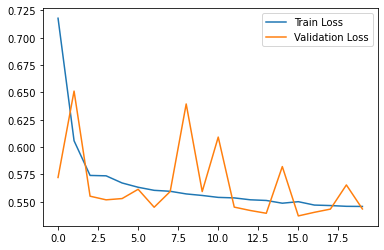

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#What result did we get when we put it into the Encoder Model
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(dataset_test)

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

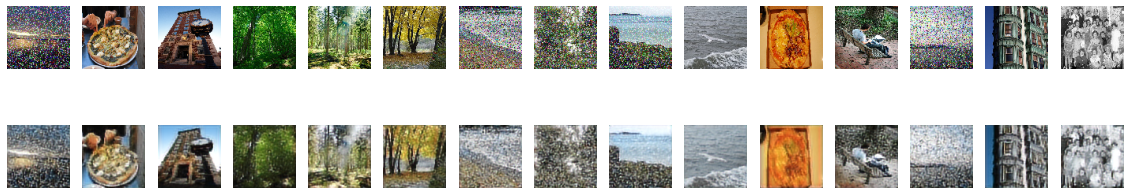

In [ ]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

In [ ]:
history = autoencoder.fit(dataset_train, dataset_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = (dataset_train,dataset_train)) #input ve output aynı olduğu için dataset_train veriyoruz 

Train on 16640 samples, validate on 16640 samples
Epoch 1/50
16640/16640 [==============================] - 9s 549us/step - loss: 1.2483 - val_loss: 0.5894
Epoch 2/50
16640/16640 [==============================] - 9s 536us/step - loss: 0.6013 - val_loss: 0.5699
Epoch 3/50
16640/16640 [==============================] - 9s 534us/step - loss: 0.5918 - val_loss: 0.6251
Epoch 4/50
16640/16640 [==============================] - 9s 535us/step - loss: 0.5758 - val_loss: 0.5951
Epoch 5/50
16640/16640 [==============================] - 9s 535us/step - loss: 0.5716 - val_loss: 0.5592
Epoch 6/50
16640/16640 [==============================] - 9s 534us/step - loss: 0.5682 - val_loss: 0.5474
Epoch 7/50
16640/16640 [==============================] - 9s 534us/step - loss: 0.5648 - val_loss: 0.6526
Epoch 8/50
16640/16640 [==============================] - 9s 535us/step - loss: 0.5618 - val_loss: 0.5617
Epoch 9/50
16640/16640 [==============================] - 9s 535us/step - loss: 0.5623 - val_loss: 0.5

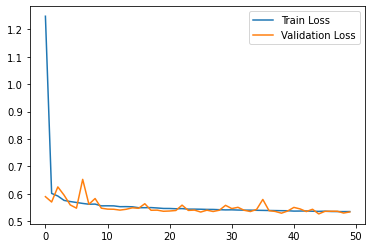

In [ ]:
#visualizing the loss and validation loss value to get better idea.
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
#predict the decodes images using test dataset
decodes_imgs = autoencoder.predict(dataset_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

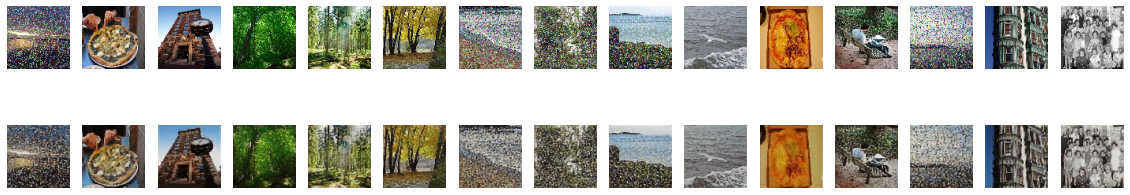

In [ ]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dataset_test[i].reshape(80, 80,3))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodes_imgs[i].reshape(80, 80, 3))
    plt.axis("off")
plt.show()

At the last stage of Autoencoder, I created our CNN model and worked on this model. At first, the epoch count was 20 and my loss value was 0.5458, and my validation loss value was 0.5435. It is not very low values ​​when I look at it, but when I visualized my model, I saw that although I did not make 250 epoch in the previous steps, I did not get such good results. The result I got with 20 epoch was really good. When I saw the result like this, I trained my model once again by making an epoch count of 50 and this time my loss value was 0.5350 and my validation loss value was 0.5336. It gave numerically more optimistic results than 20 epoch. When we visualize the model, if we compare the last two situations, we can really see the difference. I can say that using Autoencoder in CNN gave me better results with less epoch. With 500 epoch I did not get such clear results that my layers in CNN were not so high. In general, the underfitting incident always came up against me. I got good results when I changed the epoch count or hyperparameters, especially in my CNN model. We can achieve better results by playing with hyperparameters or with layer numbers.

I finished the autoencoder part and now I will create my GANs model and work on the same dataset. First of all, I would like to start by giving information about the GAN model. We do what we try to do in the GAN model autoencoder, but we follow a completely different path. We can define GAN as structures that learn to create new data with the same statistical values ​​as the training set. We have two models in GAN. The first is Generator, the other is Discriminator. Generator is our manufacturer network and Discriminator is our distinctive network. Our goal in GANs model is to obtain real data that is indistinguishable from the reality. So how does it do this? As I said, it consists of 2 generator and discriminator networks. We have real data, generator and discriminator. Real data and data produced from generator are given to discriminato. Label of real data is marked as y = 1, label of the data from generator is marked as y = 0. These two data come to the discriminator and the discriminator decides whether the incoming data is fake or real. Of course, he learns them with the help of backpropagation. So how does the generator network work? If I explain the basic logic on the picture, it creates a blank picture and adds noise on it. It turns out a beautiful picture with no meaning, then gives it to discriminator and makes label y = 1. So he's trying to fool the discrminator. Discriminator is looking at the picture that says that this picture is not like the real picture, it says take it and give it a new one, so it gives feedback with backpropagation. Generator also says okay, generates new data with the help of backpropagation and as a result of this process, the generator tries to produce the correct data. One of the important points here is that we train the generator but we do not train the discriminator because if we constantly develop the discriminator, this time the generator can never deceive the discriminator and the generator cannot produce pictures. Discrimator works as I mentioned. Briefly, we can summarize as generator thief, and discriminator as detective. Let's examine how we are developing the code step by step.

In [ ]:
#I create GANs Model
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [ ]:
#create generator
def create_generator():
  generator = Sequential() # I created the structure on which we will add the layers.

  generator.add(Dense(units=512, input_dim=100))
  generator.add(ReLU())

  generator.add(Dense(units=512))
  generator.add(ReLU())

  generator.add(Dense(units=1024))
  generator.add(ReLU())

  generator.add(Dense(units=19200, activation = "tanh"))

  generator.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.0001, beta_1 = 0.5)) #beta self update parameter

  return generator

In [ ]:
g = create_generator()
g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              525312    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 19200)            

In [ ]:
#I create discrimator part
def create_discriminator():
  discriminator = Sequential() # I created the structure on which we will add the layers.

  discriminator.add(Dense(units=1024, input_dim = 19200))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4)) # I add some dropout because to avoid overfitting. I eliminate some unnecessary parts.

  discriminator.add(Dense(units=512))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  discriminator.add(Dense(units=256))
  discriminator.add(ReLU())

  discriminator.add(Dense(units=1, activation="sigmoid"))

  discriminator.compile(loss = "binary_crossentropy", optimizer = Adam(lr=0.001, beta_1=0.5))
  return discriminator

In [ ]:
d = create_discriminator()
d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              19661824  
_________________________________________________________________
re_lu_4 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

In [ ]:
#I create the gans model
def create_gan(discriminator, generator):
  discriminator.trainable = False #Like I explained it should be must
  gan_input = Input(shape = (100,))
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs= gan_input, outputs = gan_output)
  gan.compile(loss = "binary_crossentropy", optimizer = "adam")
  return gan

In [ ]:
gans = create_gan(d,g)
gans.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 19200)             20519680  
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 20318209  
Total params: 40,837,889
Trainable params: 20,519,680
Non-trainable params: 20,318,209
_________________________________________________________________


In [ ]:
#Hyperparametres
epochs = 50
batch_size= 256

In [ ]:
loss = [] #I will add discrimnator loss value and validation loss value
for e in range(epochs + 1):
  for _ in range (batch_size):
    noise = np.random.normal(0,1, [batch_size, 100]) #I identified noise
    generated_images = g.predict(noise)#I gave the noise to the generator and generated a random image for me.
    image_batch = dataset_train[np.random.randint(low = 0, high=dataset_train.shape[0], size = batch_size)] #256 images from the option train
    x = np.concatenate([image_batch, generated_images])

    y_dis = np.zeros(batch_size*2) #I create the labels for the discriminator.
    y_dis[:batch_size] = 1 #I said batch 1 to you because they are real pictures. So image_batch in labeli 1, generated_images labeli 0
    
    d.trainable = True
    disc = d.train_on_batch(x,y_dis)

    noise = np.random.normal(0,1, [batch_size,100])
    y_gen = np.ones(batch_size)#I made label 1 to trick discriminator.

    d.trainable = False

    gan = gans.train_on_batch(noise, y_gen)

  if epochs %10 == 0:
    print ("%d [Discrimator loss: %f] [Generator loss: %f]" % (e, disc, gan))
    loss.append((disc,gan))

0 [Discrimator loss: 0.695642] [Generator loss: 0.760028]
1 [Discrimator loss: 0.694217] [Generator loss: 0.695692]
2 [Discrimator loss: 0.693872] [Generator loss: 0.722959]
3 [Discrimator loss: 0.693275] [Generator loss: 0.697168]
4 [Discrimator loss: 0.693106] [Generator loss: 0.694311]
5 [Discrimator loss: 0.692963] [Generator loss: 0.699111]
6 [Discrimator loss: 0.693015] [Generator loss: 0.694058]
7 [Discrimator loss: 0.693385] [Generator loss: 0.693534]
8 [Discrimator loss: 0.693179] [Generator loss: 0.693034]
9 [Discrimator loss: 0.693008] [Generator loss: 0.701342]
10 [Discrimator loss: 0.692732] [Generator loss: 0.693573]
11 [Discrimator loss: 0.693101] [Generator loss: 0.694180]
12 [Discrimator loss: 0.693143] [Generator loss: 0.692606]
13 [Discrimator loss: 0.693178] [Generator loss: 0.694544]
14 [Discrimator loss: 0.693175] [Generator loss: 0.691490]
15 [Discrimator loss: 0.692870] [Generator loss: 0.692291]
16 [Discrimator loss: 0.693078] [Generator loss: 0.693443]
17 [Dis

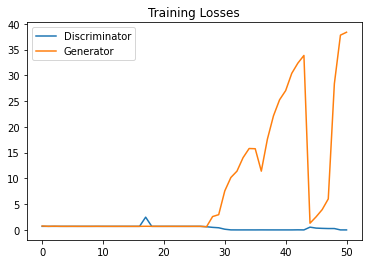

In [ ]:
#Visualizing the discrimator and genrator loss
loss = np.array(loss)
fig, ax = plt.subplots()
plt.plot(loss.T[0], label='Discriminator')
plt.plot(loss.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

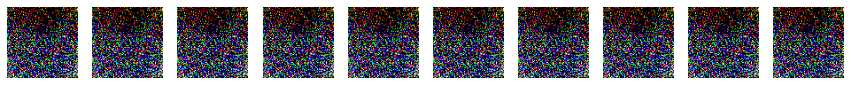

In [ ]:
# Plot images
from PIL import Image
zeros = np.zeros((10000,12288))
plt.figure(figsize=(15,3))
for j in range(10):
  zz = np.zeros((10000))
  zz[np.random.randint(10000)] = 1
  plt.subplot(1,10,j+1)
  img = g.predict(zz.reshape((-1,100)))[0].reshape((-1,80,80,3))
  img = Image.fromarray( (img).astype('uint8').reshape((80,80,3)))
  plt.axis('off')
  plt.imshow(img)
plt.show()   

We ran our GANs model and if we evaluate the results, we see that it is underfitting because what the generator was doing was generating a picture of random meaningless noise, and aimed to deceive the discriminator by making its label 1. As a result of 50 epoch we see that the pictures are only in the noise stage. We see that he needs more epoch, so let's train our model again by changing the number of epoch and look at the results. By the way, the generator loss did not go so badly that I could not make sense, it suddenly increased too much, then it decreased back, it rose back. I can say that I could not understand the reason.

In [ ]:
#Hyperparametres
epochs = 75
batch_size= 256

In [ ]:
loss = [] #I will add discrimnator loss value and validation loss value
for e in range(epochs + 1):
  for _ in range (batch_size):
    noise = np.random.normal(0,1, [batch_size, 100]) #I identified noise
    generated_images = g.predict(noise)#I gave the noise to the generator and generated a random image for me.
    image_batch = dataset_train[np.random.randint(low = 0, high=dataset_train.shape[0], size = batch_size)] #256 images from the option train
    x = np.concatenate([image_batch, generated_images])

    y_dis = np.zeros(batch_size*2) #I create the labels for the discriminator.
    y_dis[:batch_size] = 1 #I said batch 1 to you because they are real pictures. So image_batch in labeli 1, generated_images labeli 0
    
    d.trainable = True
    disc = d.train_on_batch(x,y_dis)

    noise = np.random.normal(0,1, [batch_size,100])
    y_gen = np.ones(batch_size)#I made label 1 to trick discriminator.

    d.trainable = False

    gan = gans.train_on_batch(noise, y_gen)

  if epochs %5 == 0:
    print ("%d [Discrimator loss: %f] [Generator loss: %f]" % (e, disc, gan))
    loss.append((disc,gan))

0 [Discrimator loss: 0.693598] [Generator loss: 0.693820]
1 [Discrimator loss: 0.692719] [Generator loss: 0.695673]
2 [Discrimator loss: 0.693139] [Generator loss: 0.694661]
3 [Discrimator loss: 0.691612] [Generator loss: 0.693572]
4 [Discrimator loss: 0.692934] [Generator loss: 0.692121]
5 [Discrimator loss: 0.692937] [Generator loss: 0.694004]
6 [Discrimator loss: 0.693207] [Generator loss: 0.693346]
7 [Discrimator loss: 0.693064] [Generator loss: 0.693938]
8 [Discrimator loss: 0.693179] [Generator loss: 0.693537]
9 [Discrimator loss: 0.693130] [Generator loss: 0.693620]
10 [Discrimator loss: 0.693165] [Generator loss: 0.693048]
11 [Discrimator loss: 0.693125] [Generator loss: 0.693086]
12 [Discrimator loss: 0.693192] [Generator loss: 0.693250]
13 [Discrimator loss: 0.693158] [Generator loss: 0.693455]
14 [Discrimator loss: 0.693121] [Generator loss: 0.692383]
15 [Discrimator loss: 0.693000] [Generator loss: 0.694386]
16 [Discrimator loss: 0.693310] [Generator loss: 0.693874]
17 [Dis

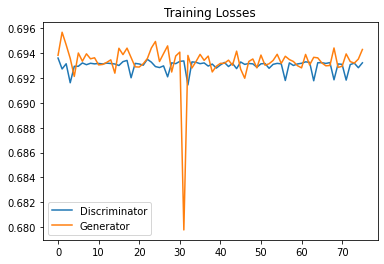

In [ ]:
#Visualizing the discrimator and genrator loss
loss = np.array(loss)
fig, ax = plt.subplots()
plt.plot(loss.T[0], label='Discriminator')
plt.plot(loss.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

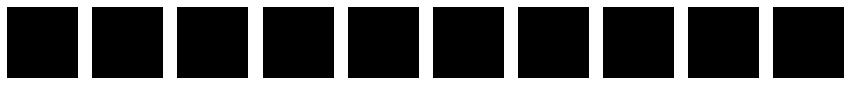

In [ ]:
# Plot images
from PIL import Image
zeros = np.zeros((10000,12288))
plt.figure(figsize=(15,3))
for j in range(10):
  zz = np.zeros((10000))
  zz[np.random.randint(10000)] = 1
  plt.subplot(1,10,j+1)
  img = g.predict(zz.reshape((-1,100)))[1].reshape((-1,80,80,3))
  img = Image.fromarray( (img).astype('uint8').reshape((80,80,3)))
  plt.axis('off')
  plt.imshow(img)
plt.show()   

I also got some results from my GANs model, but the results were not what I wanted very much. If we look at what I generally do, I created models on the autoencoder in 4 steps, changed hyperparameters and trained the models several times. I compared my results in case I have problems such as overfitting and underfitting and wrote the necessary comments. I worked on deep learning and unsupervised learning for my final project. If I make a result comparison, I can say that if I use autoencoder with CNN, I can get the best results if I base epoch numbers and hyperparameters. I did not get very effective results in GAN, how can I fix this. I can add more layers, I think by playing with hyperparameters, you can get better results. If I make a model comparison, the CNN autoencoder model gave the best results under these conditions.